In [1]:
##import libraries##
from astropy.io import fits
import numpy as np
import healpy as hp



In [2]:
##access fits file##
hdulist = fits.open('shared_image2.fits')
data = hdulist[0].data
hdulist.close()

image_array = np.array(data)

In [3]:
##spherical co-ordinates##
theta = np.linspace(0, np.pi, num=image_array.shape[0])[:,None]
phi = np.linspace(-np.pi, np.pi, num=image_array.shape[1])

In [4]:
##set angular resolution##
nside = 16
print("Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))

Pixel area: 13.43 square degrees


In [5]:
pix = hp.ang2pix(nside, theta, phi)
healpix_map = np.zeros(hp.nside2npix(nside), dtype=np.double)
healpix_map[pix]=image_array

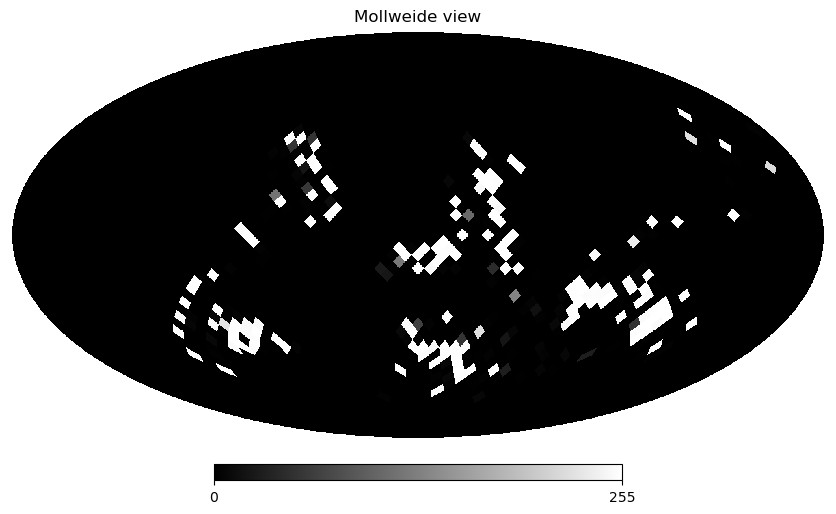

In [6]:
hp.mollview(healpix_map, cmap="gray", xsize=2000, flip="geo")